# LangChain 数据加载器测试实践

本 notebook 演示如何使用 LangChain 中的各种数据加载器来加载不同格式的数据。

## 涵盖的加载器类型：
1. 文本文件加载器 (TextLoader)
2. CSV 文件加载器 (CSVLoader)
3. PDF 文件加载器 (PyPDFLoader)
4. 图片加载器 (ImageLoader)

## 1. 安装依赖

首先安装所需的包：

In [1]:
# 安装 LangChain 和相关依赖
%pip install langchain langchain-community
%pip install pypdf  # PDF 加载
%pip install pillow  # 图片处理
%pip install pytesseract  # 图片 OCR（可选）
%pip install reportlab  # 创建示例 PDF

Looking in indexes: https://mirrors.aliyun.com/pypi/simple
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://mirrors.aliyun.com/pypi/simple
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://mirrors.aliyun.com/pypi/simple
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://mirrors.aliyun.com/pypi/simple
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://mirrors.aliyun.com/pypi/simple
Note: you may need to restart the kernel to use updated packages.


## 2. 导入必要的库

In [2]:
import os
from pathlib import Path

# LangChain 加载器
from langchain_community.document_loaders import (
    TextLoader,
    CSVLoader,
    UnstructuredPDFLoader,
    UnstructuredImageLoader
)

# 辅助库
from PIL import Image
import pandas as pd

print("✅ 所有库导入成功！")

✅ 所有库导入成功！


## 3. 创建示例 PDF 文件

使用 reportlab 创建一个示例 PDF 文件：

In [13]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

# 确保 sample_data 目录存在
os.makedirs('sample_data', exist_ok=True)

# 创建 PDF 文件
pdf_file = 'sample_data/sample_document.pdf'
c = canvas.Canvas(pdf_file, pagesize=letter)
width, height = letter

# 添加标题
c.setFont('Helvetica-Bold', 24)
c.drawString(100, height - 100, 'LangChain PDF Loader Test Document')

# 添加内容
c.setFont('Helvetica', 12)
y = height - 150

lines = [
    'This is a sample PDF file for testing LangChain PDFLoader.',
    '',
    'About LangChain:',
    '',
    'LangChain is a framework for developing applications powered by language models. It provides:',
    '',
    '1. Document Loaders - Support for PDF, Word, CSV, and more',
    '2. Text Splitters - Breaking long documents into manageable chunks',
    '3. Vector Stores - For semantic search and retrieval',
    '4. Chained Operations - Combing multiple operations into complex workflows',
    '',
    'Advantages of PDF Documents:',
    '- High cross-platform compatibility',
    '- Consistent formatting across devices',
    '- Support for text, images, tables, and more',
    '- Widely used for document archiving and distribution',
]

for line in lines:
    c.drawString(100, y, line)
    y -= 20

c.save()
print(f'✅ PDF 文件已创建: {pdf_file}')

✅ PDF 文件已创建: sample_data/sample_document.pdf


## 4. 文本文件加载器 (TextLoader)

TextLoader 用于加载纯文本文件。

In [4]:
# 加载文本文件
text_loader = TextLoader('sample_data/sample_text.txt', encoding='utf-8')
text_documents = text_loader.load()

print(f"📄 加载的文档数量: {len(text_documents)}")
print(f"\n文档内容预览:")
print("=" * 80)
print(text_documents[0].page_content[:300])
print("=" * 80)
print(f"\n文档元数据: {text_documents[0].metadata}")

📄 加载的文档数量: 1

文档内容预览:
LangChain 数据加载器测试文档

这是一个用于测试 LangChain TextLoader 的示例文本文件。

LangChain 是一个强大的框架，用于开发由语言模型驱动的应用程序。它提供了多种数据加载器，可以从不同的数据源加载和处理数据。

主要特点：
1. 支持多种数据格式
2. 易于集成和使用
3. 可扩展的架构
4. 丰富的文档加载器

本文件将用于演示如何使用 TextLoader 加载和处理文本文件。
LangChain 的文档加载器可以将各种格式的文件转换为统一的 Document 对象，便于后续的处理和分析。

通过这些加载器，我们可以轻松地构建 RAG（检索增强生

文档元数据: {'source': 'sample_data/sample_text.txt'}


## 5. CSV 文件加载器 (CSVLoader)

CSVLoader 用于加载 CSV 格式的表格数据。

In [5]:
# 首先查看 CSV 文件内容
df = pd.read_csv('sample_data/sample_data.csv')
print("📊 CSV 文件预览:")
print(df.head())
print(f"\n数据形状: {df.shape}")

📊 CSV 文件预览:
   姓名  年龄     职位   部门                    邮箱
0  张三  28  软件工程师  技术部  zhangsan@example.com
1  李四  32   产品经理  产品部      lisi@example.com
2  王五  25  数据分析师  数据部    wangwu@example.com
3  赵六  30  UI设计师  设计部   zhaoliu@example.com
4  钱七  27  运维工程师  技术部    qianqi@example.com

数据形状: (8, 5)


In [6]:
# 使用 CSVLoader 加载
csv_loader = CSVLoader(
    file_path='sample_data/sample_data.csv',
    encoding='utf-8'
)
csv_documents = csv_loader.load()

print(f"📊 加载的文档数量: {len(csv_documents)}")
print(f"\n每行数据都被转换为一个文档对象")
print(f"\n第一个文档内容:")
print("=" * 80)
print(csv_documents[0].page_content)
print("=" * 80)
print(f"\n文档元数据: {csv_documents[0].metadata}")

📊 加载的文档数量: 8

每行数据都被转换为一个文档对象

第一个文档内容:
姓名: 张三
年龄: 28
职位: 软件工程师
部门: 技术部
邮箱: zhangsan@example.com

文档元数据: {'source': 'sample_data/sample_data.csv', 'row': 0}


In [7]:
# 显示所有加载的记录
print("\n所有加载的员工记录:")
print("=" * 80)
for i, doc in enumerate(csv_documents, 1):
    print(f"记录 {i}:")
    print(doc.page_content)
    print("-" * 40)


所有加载的员工记录:
记录 1:
姓名: 张三
年龄: 28
职位: 软件工程师
部门: 技术部
邮箱: zhangsan@example.com
----------------------------------------
记录 2:
姓名: 李四
年龄: 32
职位: 产品经理
部门: 产品部
邮箱: lisi@example.com
----------------------------------------
记录 3:
姓名: 王五
年龄: 25
职位: 数据分析师
部门: 数据部
邮箱: wangwu@example.com
----------------------------------------
记录 4:
姓名: 赵六
年龄: 30
职位: UI设计师
部门: 设计部
邮箱: zhaoliu@example.com
----------------------------------------
记录 5:
姓名: 钱七
年龄: 27
职位: 运维工程师
部门: 技术部
邮箱: qianqi@example.com
----------------------------------------
记录 6:
姓名: 孙八
年龄: 35
职位: 架构师
部门: 技术部
邮箱: sunba@example.com
----------------------------------------
记录 7:
姓名: 周九
年龄: 29
职位: 测试工程师
部门: 质量部
邮箱: zhoujiu@example.com
----------------------------------------
记录 8:
姓名: 吴十
年龄: 31
职位: 项目经理
部门: 项目部
邮箱: wushi@example.com
----------------------------------------


## 6. PDF 文件加载器 (UnstructuredPDFLoader)

UnstructuredPDFLoader 用于加载 PDF 文档。

In [14]:
# 加载 PDF 文件
pdf_loader = UnstructuredPDFLoader('sample_data/sample_document.pdf')
pdf_documents = pdf_loader.load()

print(f"📕 加载的页数: {len(pdf_documents)}")
print(f"\n第一页内容预览:")
print("=" * 80)
print(pdf_documents[0].page_content[:500])
print("=" * 80)
print(f"\n文档元数据: {pdf_documents[0].metadata}")

📕 加载的页数: 1

第一页内容预览:
LangChain PDF Loader Test Document

This is a sample PDF file for testing LangChain PDFLoader.

About LangChain:

LangChain is a framework for developing applications powered by language models. It provides:

1. Document Loaders - Support for PDF, Word, CSV, and more

2. Text Splitters - Breaking long documents into manageable chunks

3. Vector Stores - For semantic search and retrieval

4. Chained Operations - Combing multiple operations into complex workflows

Advantages of PDF Documents:

Hig

文档元数据: {'source': 'sample_data/sample_document.pdf'}


## 7. 图片加载器 (UnstructuredImageLoader)

UnstructuredImageLoader 用于加载图片文件，可以提取图片中的文本（如果有OCR支持）。

🖼️  图片尺寸: (800, 600)
图片格式: JPEG
图片模式: RGB


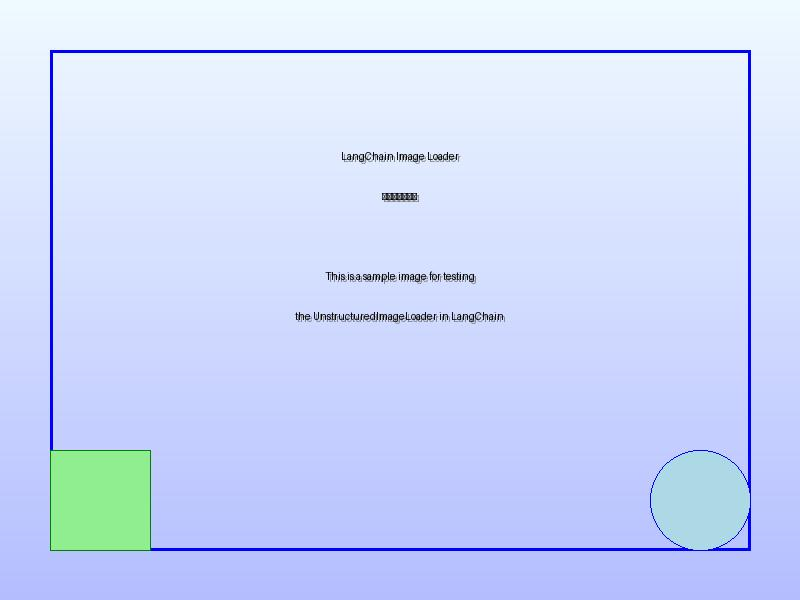

In [9]:
# 首先检查图片文件
image_path = 'sample_data/sample_image.jpg'

if os.path.exists(image_path):
    # 显示图片信息
    img = Image.open(image_path)
    print(f"🖼️  图片尺寸: {img.size}")
    print(f"图片格式: {img.format}")
    print(f"图片模式: {img.mode}")
    
    # 在 Jupyter 中显示图片
    from IPython.display import display
    display(img)
else:
    print(f"⚠️  图片文件不存在: {image_path}")
    print("正在创建示例图片...")
    
    # 创建一个简单的示例图片
    from PIL import ImageDraw, ImageFont
    
    img = Image.new('RGB', (800, 600), color='white')
    draw = ImageDraw.Draw(img)
    
    # 添加文本
    text = "LangChain Image Loader\n测试图片"
    draw.text((200, 250), text, fill='black')
    
    # 保存图片
    img.save(image_path)
    print(f"✅ 示例图片已创建: {image_path}")

In [10]:
# 使用基本的图片加载方式（不需要 OCR）
# 注意：UnstructuredImageLoader 需要额外的依赖
# 如果没有安装 unstructured，可以使用自定义加载方式

try:
    # 尝试使用 UnstructuredImageLoader
    from langchain_community.document_loaders import UnstructuredImageLoader
    
    image_loader = UnstructuredImageLoader(image_path, strategy="ocr_only", download_models=False)
    image_documents = image_loader.load()
    
    print(f"🖼️  加载的图片文档数量: {len(image_documents)}")
    print(f"\n文档内容:")
    print("=" * 80)
    print(image_documents[0].page_content[:300])
    print("=" * 80)
    print(f"\n文档元数据: {image_documents[0].metadata}")
    
except Exception as e:
    print(f"⚠️  UnstructuredImageLoader 不可用: {e}")
    print("\n使用替代方案：创建自定义文档对象")
    
    from langchain.schema import Document
    
    # 创建包含图片信息的文档
    img = Image.open(image_path)
    image_doc = Document(
        page_content=f"Image file: {image_path}\nSize: {img.size}\nFormat: {img.format}",
        metadata={
            "source": image_path,
            "width": img.size[0],
            "height": img.size[1],
            "format": img.format
        }
    )
    
    print(f"\n自定义图片文档:")
    print("=" * 80)
    print(image_doc.page_content)
    print("=" * 80)
    print(f"\n文档元数据: {image_doc.metadata}")

🖼️  加载的图片文档数量: 1

文档内容:
‘Thisisasomple image fortesting,

‘the Unstructuredimagelcarenin Lana@hain

文档元数据: {'source': 'sample_data/sample_image.jpg'}


## 8. 总结和比较

让我们总结一下各种加载器的特点和使用场景：

In [11]:
summary_data = {
    '加载器': ['TextLoader', 'CSVLoader', 'UnstructuredPDFLoader', 'UnstructuredImageLoader'],
    '适用文件': ['纯文本文件', 'CSV表格文件', 'PDF文档', '图片文件'],
    '主要用途': [
        '加载文本文档、日志、代码等',
        '加载结构化表格数据',
        '加载PDF报告、论文、书籍等',
        '提取图片内容（需OCR支持）'
    ],
    '输出格式': [
        '单个Document对象',
        '每行一个Document对象',
        '每页一个Document对象',
        'Document对象（含图片描述）'
    ],
    '额外依赖': ['无', '无', 'unstructured', 'unstructured, pytesseract']
}

summary_df = pd.DataFrame(summary_data)
print("\n📊 LangChain 数据加载器对比:")
print("=" * 100)
print(summary_df.to_string(index=False))
print("=" * 100)


📊 LangChain 数据加载器对比:
                    加载器    适用文件           主要用途              输出格式                      额外依赖
             TextLoader   纯文本文件  加载文本文档、日志、代码等      单个Document对象                         无
              CSVLoader CSV表格文件      加载结构化表格数据    每行一个Document对象                         无
  UnstructuredPDFLoader   PDF文档 加载PDF报告、论文、书籍等    每页一个Document对象              unstructured
UnstructuredImageLoader    图片文件 提取图片内容（需OCR支持） Document对象（含图片描述） unstructured, pytesseract


## 9. 完整示例：综合使用多个加载器

In [15]:
# 综合示例：加载所有类型的文档
all_documents = []

# 加载文本文件
text_docs = TextLoader('sample_data/sample_text.txt', encoding='utf-8').load()
all_documents.extend(text_docs)
print(f"✅ 加载了 {len(text_docs)} 个文本文档")

# 加载 CSV 文件
csv_docs = CSVLoader('sample_data/sample_data.csv', encoding='utf-8').load()
all_documents.extend(csv_docs)
print(f"✅ 加载了 {len(csv_docs)} 个 CSV 记录")

# 加载 PDF 文件
pdf_docs = UnstructuredPDFLoader('sample_data/sample_document.pdf').load()
all_documents.extend(pdf_docs)
print(f"✅ 加载了 {len(pdf_docs)} 个 PDF 页面")

print(f"\n📚 总共加载了 {len(all_documents)} 个文档对象")

# 显示每种类型的第一个文档
print("\n各类型文档示例:")
print("=" * 100)
for i, doc in enumerate([text_docs[0], csv_docs[0], pdf_docs[0]], 1):
    print(f"\n文档 {i} - 来源: {doc.metadata.get('source', 'Unknown')}")
    print(f"内容预览: {doc.page_content[:100]}...")
    print("-" * 100)

✅ 加载了 1 个文本文档
✅ 加载了 8 个 CSV 记录
✅ 加载了 1 个 PDF 页面

📚 总共加载了 10 个文档对象

各类型文档示例:

文档 1 - 来源: sample_data/sample_text.txt
内容预览: LangChain 数据加载器测试文档

这是一个用于测试 LangChain TextLoader 的示例文本文件。

LangChain 是一个强大的框架，用于开发由语言模型驱动的应用程序。它提供...
----------------------------------------------------------------------------------------------------

文档 2 - 来源: sample_data/sample_data.csv
内容预览: 姓名: 张三
年龄: 28
职位: 软件工程师
部门: 技术部
邮箱: zhangsan@example.com...
----------------------------------------------------------------------------------------------------

文档 3 - 来源: sample_data/sample_document.pdf
内容预览: LangChain PDF Loader Test Document

This is a sample PDF file for testing LangChain PDFLoader.

Abou...
----------------------------------------------------------------------------------------------------
